# Prediction with LightGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

Faster training speed and higher efficiency.

Lower memory usage.

Better accuracy.

Support of parallel and GPU learning.

Capable of handling large-scale data.

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('final_train.csv')

In [4]:
df_test= pd.read_csv('test_V2.csv')

In [5]:
df_train.columns

Index(['Unnamed: 0', 'totalDistance', 'weaponsAcquired', 'healsAndBoosts',
       'longestKill', 'killsNorm', 'assists', 'DBNOs', 'headshotKills',
       'revives', 'vehicleDestroys', 'winPlacePerc', 'killPlace', 'numGroups'],
      dtype='object')

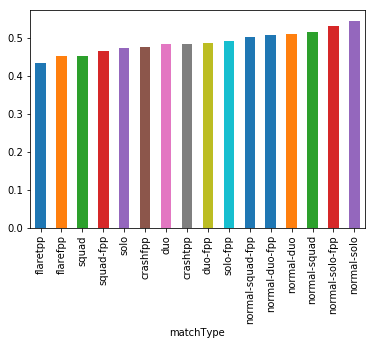

In [6]:
df_trial= pd.read_csv('train_v3.csv')
df_trial.groupby("matchType")["winPlacePerc"].mean().sort_values().plot(kind = "bar")

In [7]:
match_type = pd.get_dummies(df_trial["matchType"])
df_trial["playersInMatch"] = df_trial.groupby("matchId")["Id"].transform("count")
df_trial["playersInGroup"] = df_trial.groupby("groupId")["Id"].transform("count")

In [8]:
df_trial = pd.concat([df_trial,match_type], axis = 1)
df_trial.drop(["matchType","matchId","groupId"],axis=1,inplace=True)

In [9]:
df_trial.drop(["killPoints","maxPlace","winPoints"], axis = 1, inplace = True)

In [10]:
match_type = pd.get_dummies(df_test["matchType"])
df_test["playersInMatch"] = df_test.groupby("matchId")["Id"].transform("count")
df_test["playersInGroup"] = df_test.groupby("groupId")["Id"].transform("count")
df_test = pd.concat([df_test,match_type], axis = 1)
df_test.drop(["matchType","matchId","groupId"],axis=1,inplace=True)
df_test.drop(["killPoints","maxPlace","winPoints"], axis = 1, inplace = True)

In [11]:
df_trial.set_index("Id",inplace=True)

In [12]:
import lightgbm as lgb #Boosting
from sklearn.ensemble import RandomForestRegressor #RF
from sklearn.linear_model import Ridge #Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_trial.drop(["winPlacePerc"], axis=1).values
Y = df_trial["winPlacePerc"].values

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print("X_train:",X_train.shape)
print("Y_train:",Y_train.shape)
print("X_test:",X_test.shape)
print("Y_test:",Y_test.shape)

X_train: (3555820, 40)
Y_train: (3555820,)
X_test: (888956, 40)
Y_test: (888956,)


In [16]:
%%time
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
lgbm_params = {'objective': 'regression','metric': 'rmse'}
m_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, 
                  num_boost_round=2000,
                  early_stopping_rounds=5)

[1]	valid_0's rmse: 0.281422
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's rmse: 0.258284
[3]	valid_0's rmse: 0.237754
[4]	valid_0's rmse: 0.21951
[5]	valid_0's rmse: 0.203245
[6]	valid_0's rmse: 0.189047
[7]	valid_0's rmse: 0.176459
[8]	valid_0's rmse: 0.165468
[9]	valid_0's rmse: 0.155896
[10]	valid_0's rmse: 0.147457
[11]	valid_0's rmse: 0.139897
[12]	valid_0's rmse: 0.133482
[13]	valid_0's rmse: 0.127742
[14]	valid_0's rmse: 0.122981
[15]	valid_0's rmse: 0.118631
[16]	valid_0's rmse: 0.114894
[17]	valid_0's rmse: 0.111768
[18]	valid_0's rmse: 0.108843
[19]	valid_0's rmse: 0.106384
[20]	valid_0's rmse: 0.10443
[21]	valid_0's rmse: 0.102151
[22]	valid_0's rmse: 0.0999877
[23]	valid_0's rmse: 0.0985629
[24]	valid_0's rmse: 0.0974156
[25]	valid_0's rmse: 0.0963604
[26]	valid_0's rmse: 0.0949662
[27]	valid_0's rmse: 0.0941516
[28]	valid_0's rmse: 0.0931985
[29]	valid_0's rmse: 0.0924184
[30]	valid_0's rmse: 0.0917183
[31]	valid_0's rmse: 0.0908574
[32]	valid

[261]	valid_0's rmse: 0.0765143
[262]	valid_0's rmse: 0.0765085
[263]	valid_0's rmse: 0.076501
[264]	valid_0's rmse: 0.0764952
[265]	valid_0's rmse: 0.0764925
[266]	valid_0's rmse: 0.076489
[267]	valid_0's rmse: 0.0764857
[268]	valid_0's rmse: 0.0764822
[269]	valid_0's rmse: 0.0764803
[270]	valid_0's rmse: 0.0764726
[271]	valid_0's rmse: 0.076467
[272]	valid_0's rmse: 0.0764625
[273]	valid_0's rmse: 0.076458
[274]	valid_0's rmse: 0.0764502
[275]	valid_0's rmse: 0.0764427
[276]	valid_0's rmse: 0.0764373
[277]	valid_0's rmse: 0.0764329
[278]	valid_0's rmse: 0.0764305
[279]	valid_0's rmse: 0.0764276
[280]	valid_0's rmse: 0.0764259
[281]	valid_0's rmse: 0.0764201
[282]	valid_0's rmse: 0.0764185
[283]	valid_0's rmse: 0.0764165
[284]	valid_0's rmse: 0.0764163
[285]	valid_0's rmse: 0.0764123
[286]	valid_0's rmse: 0.0764028
[287]	valid_0's rmse: 0.0763985
[288]	valid_0's rmse: 0.0763953
[289]	valid_0's rmse: 0.0763895
[290]	valid_0's rmse: 0.0763855
[291]	valid_0's rmse: 0.0763806
[292]	valid_

[518]	valid_0's rmse: 0.0757478
[519]	valid_0's rmse: 0.0757467
[520]	valid_0's rmse: 0.0757438
[521]	valid_0's rmse: 0.0757407
[522]	valid_0's rmse: 0.0757398
[523]	valid_0's rmse: 0.0757386
[524]	valid_0's rmse: 0.0757382
[525]	valid_0's rmse: 0.0757366
[526]	valid_0's rmse: 0.0757341
[527]	valid_0's rmse: 0.0757315
[528]	valid_0's rmse: 0.0757304
[529]	valid_0's rmse: 0.0757299
[530]	valid_0's rmse: 0.0757295
[531]	valid_0's rmse: 0.0757292
[532]	valid_0's rmse: 0.0757251
[533]	valid_0's rmse: 0.0757246
[534]	valid_0's rmse: 0.0757245
[535]	valid_0's rmse: 0.0757246
[536]	valid_0's rmse: 0.0757221
[537]	valid_0's rmse: 0.0757212
[538]	valid_0's rmse: 0.0757185
[539]	valid_0's rmse: 0.0757158
[540]	valid_0's rmse: 0.0757151
[541]	valid_0's rmse: 0.075714
[542]	valid_0's rmse: 0.0757087
[543]	valid_0's rmse: 0.0757078
[544]	valid_0's rmse: 0.075704
[545]	valid_0's rmse: 0.0757042
[546]	valid_0's rmse: 0.0757035
[547]	valid_0's rmse: 0.0757021
[548]	valid_0's rmse: 0.0757016
[549]	vali

[776]	valid_0's rmse: 0.0753767
[777]	valid_0's rmse: 0.0753748
[778]	valid_0's rmse: 0.0753747
[779]	valid_0's rmse: 0.0753741
[780]	valid_0's rmse: 0.0753698
[781]	valid_0's rmse: 0.0753692
[782]	valid_0's rmse: 0.0753678
[783]	valid_0's rmse: 0.0753661
[784]	valid_0's rmse: 0.0753644
[785]	valid_0's rmse: 0.0753629
[786]	valid_0's rmse: 0.075363
[787]	valid_0's rmse: 0.075363
[788]	valid_0's rmse: 0.0753617
[789]	valid_0's rmse: 0.0753612
[790]	valid_0's rmse: 0.0753606
[791]	valid_0's rmse: 0.0753609
[792]	valid_0's rmse: 0.0753609
[793]	valid_0's rmse: 0.0753594
[794]	valid_0's rmse: 0.0753595
[795]	valid_0's rmse: 0.0753581
[796]	valid_0's rmse: 0.0753518
[797]	valid_0's rmse: 0.0753503
[798]	valid_0's rmse: 0.07535
[799]	valid_0's rmse: 0.0753474
[800]	valid_0's rmse: 0.0753449
[801]	valid_0's rmse: 0.0753446
[802]	valid_0's rmse: 0.0753447
[803]	valid_0's rmse: 0.075342
[804]	valid_0's rmse: 0.0753412
[805]	valid_0's rmse: 0.0753397
[806]	valid_0's rmse: 0.0753382
[807]	valid_0

In [17]:
from sklearn.metrics import r2_score
Y_pred = m_lgb.predict(X_test, num_iteration=m_lgb.best_iteration)
r2_score(Y_test,Y_pred)

0.9402570781074794

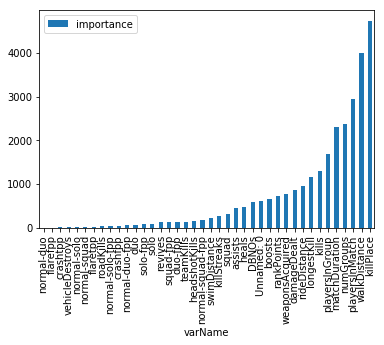

In [18]:
# df_importance_lgb = pd.DataFrame(m_lgb.feature_importance())
# df_importance_lgb.sort_values(by = m_lgb.feature_importance()).plot(kind="bar"
df_importance_lgb = pd.DataFrame({"importance":m_lgb.feature_importance(),
              "varName":[col for col in df_trial.columns if col != "winPlacePerc" ]}).\
                      set_index("varName")
df_importance_lgb.sort_values(by = "importance").plot(kind="bar")


In [19]:
df_test.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,...,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,9329eb41e215eb,0,0,51.46,0,0,0,73,0,0,...,0,0,0,0,0,0,0,0,0,1
1,639bd0dcd7bda8,0,4,179.10,0,0,2,11,2,1,...,0,0,0,0,0,0,0,0,0,0
2,63d5c8ef8dfe91,1,0,23.40,0,0,4,49,0,0,...,0,0,0,0,0,0,0,0,0,1
3,cf5b81422591d1,0,0,65.52,0,0,0,54,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ee6a295187ba21,0,4,330.20,1,2,1,7,3,1,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df_test=df_test.drop('squad-fpp', axis=1)




In [21]:
X_for_pred = df_test.values[:,1:]

In [22]:
# X_for_pred = sc.transform(X_for_pred)
Y_test_pred = m_lgb.predict(X_for_pred, num_iteration=m_lgb.best_iteration)
for_submission = pd.DataFrame({"Id":df_test.Id,"winPlacePerc":Y_test_pred})
for_submission.to_csv('submission.csv', index=False)